In [300]:
import yfinance as yf
import pandas as pd 
import numpy as np
from pathlib import Path
from pandas.tseries.offsets import DateOffset 

In [301]:
cryptocurrencies = ['BTC-USD']
start_date = "2020-07-01"
end_date = "2021-07-31"
bitcoin_data = yf.download(cryptocurrencies, start_date, end_date)

[*********************100%***********************]  1 of 1 completed


In [302]:
bitcoin_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-07-01,9145.985352,9309.754883,9104.735352,9228.325195,9228.325195,15971550355
2020-07-02,9231.139648,9274.962891,9036.623047,9123.410156,9123.410156,16338916796
2020-07-03,9124.842773,9202.344727,9058.794922,9087.303711,9087.303711,13078970999
2020-07-04,9084.233398,9183.295898,9053.629883,9132.488281,9132.488281,12290528515
2020-07-05,9126.090820,9162.183594,8977.015625,9073.942383,9073.942383,12903406143
...,...,...,...,...,...,...
2021-07-27,37276.035156,39406.941406,36441.726562,39406.941406,39406.941406,35097370560
2021-07-28,39503.187500,40816.070312,38862.437500,39995.906250,39995.906250,38702404695
2021-07-29,39995.453125,40593.070312,39352.058594,40008.421875,40008.421875,27167146027


<AxesSubplot:xlabel='Date'>

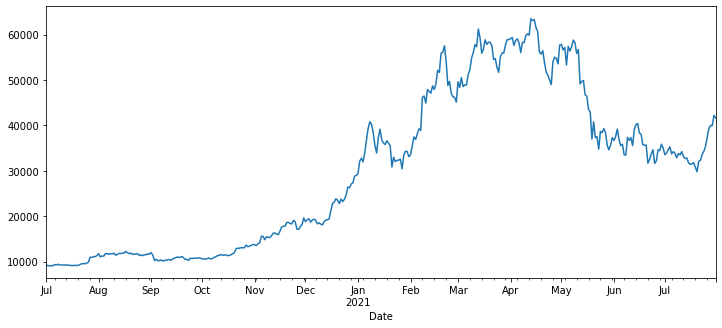

In [303]:
bitcoin_data["Close"].plot(figsize=(12,5))

In [304]:
btc_sentiments = pd.read_csv(
    Path("Resources/BTC_sentiment_analysis.csv")
)

btc_sentiments

,text,date,compound,positive,negative,neutral
0,Blue Ridge Bank shares halted by NYSE after #b...,7/1/20,0.2960,0.145,0.0,0.855
1,"😎 Today, that's this #Thursday, we will do a ""...",7/2/20,0.4939,0.151,0.0,0.849
2,"Guys evening, I have read this article about B...",7/3/20,0.5719,0.227,0.0,0.773
3,$BTC A big chance in a billion! Price: \487264...,7/4/20,0.3164,0.160,0.0,0.840
4,This network is secured by 9 508 nodes as of t...,7/5/20,0.4019,0.109,0.0,0.891
...,...,...,...,...,...,...
737,@PrvinPanghal @elonmusk Use Voyager app bro. I...,7/8/22,0.0000,0.000,0.0,1.000
738,I also hold #Axion instead of just #Bitcoin be...,7/9/22,0.0000,0.000,0.0,1.000
739,@WSBChairman Need to HODL any CRYPTO like #ETH...,7/10/22,0.3612,0.161,0.0,0.839
740,1000 satoshi every 60 minutes. only at https:/...,7/11/22,0.5106,0.155,0.0,0.845


In [305]:
btc_sentiments = btc_sentiments.set_index("date")
btc_sentiments.index = pd.to_datetime(btc_sentiments.index)
btc_sentiments 

,text,compound,positive,negative,neutral
date,,,,,
2020-07-01,Blue Ridge Bank shares halted by NYSE after #b...,0.2960,0.145,0.0,0.855
2020-07-02,"😎 Today, that's this #Thursday, we will do a ""...",0.4939,0.151,0.0,0.849
2020-07-03,"Guys evening, I have read this article about B...",0.5719,0.227,0.0,0.773
2020-07-04,$BTC A big chance in a billion! Price: \487264...,0.3164,0.160,0.0,0.840
2020-07-05,This network is secured by 9 508 nodes as of t...,0.4019,0.109,0.0,0.891
...,...,...,...,...,...
2022-07-08,@PrvinPanghal @elonmusk Use Voyager app bro. I...,0.0000,0.000,0.0,1.000
2022-07-09,I also hold #Axion instead of just #Bitcoin be...,0.0000,0.000,0.0,1.000
2022-07-10,@WSBChairman Need to HODL any CRYPTO like #ETH...,0.3612,0.161,0.0,0.839


In [306]:
btc_sentiments = btc_sentiments.loc["2020-07-01":"2021-07-31"]
btc_sentiments

,text,compound,positive,negative,neutral
date,,,,,
2020-07-01,Blue Ridge Bank shares halted by NYSE after #b...,0.2960,0.145,0.0,0.855
2020-07-02,"😎 Today, that's this #Thursday, we will do a ""...",0.4939,0.151,0.0,0.849
2020-07-03,"Guys evening, I have read this article about B...",0.5719,0.227,0.0,0.773
2020-07-04,$BTC A big chance in a billion! Price: \487264...,0.3164,0.160,0.0,0.840
2020-07-05,This network is secured by 9 508 nodes as of t...,0.4019,0.109,0.0,0.891
...,...,...,...,...,...
2021-07-27,Tip #2: Transaction monitoring is key to robus...,0.3400,0.112,0.0,0.888
2021-07-28,1 BTC Price: Bitstamp 44655.10 USD Coinbase U...,0.0000,0.000,0.0,1.000
2021-07-29,$BTC #Bitcoin #BTC #cryptocurrency\nOh boy 😱🚀🚀...,0.0000,0.000,0.0,1.000


In [307]:
btc_data_sent = pd.concat([bitcoin_data, btc_sentiments], axis=1, join="inner")
btc_data_sent = btc_data_sent.drop(columns=["text"])
display(btc_data_sent.head())
display(btc_data_sent.tail())


,Open,High,Low,Close,Adj Close,Volume,compound,positive,negative,neutral
2020-07-01,9145.985352,9309.754883,9104.735352,9228.325195,9228.325195,15971550355,0.2960,0.145,0.0,0.855
2020-07-02,9231.139648,9274.962891,9036.623047,9123.410156,9123.410156,16338916796,0.4939,0.151,0.0,0.849
2020-07-03,9124.842773,9202.344727,9058.794922,9087.303711,9087.303711,13078970999,0.5719,0.227,0.0,0.773
2020-07-04,9084.233398,9183.295898,9053.629883,9132.488281,9132.488281,12290528515,0.3164,0.160,0.0,0.840
2020-07-05,9126.090820,9162.183594,8977.015625,9073.942383,9073.942383,12903406143,0.4019,0.109,0.0,0.891


,Open,High,Low,Close,Adj Close,Volume,compound,positive,negative,neutral
2021-07-27,37276.035156,39406.941406,36441.726562,39406.941406,39406.941406,35097370560,0.3400,0.112,0.0,0.888
2021-07-28,39503.187500,40816.070312,38862.437500,39995.906250,39995.906250,38702404695,0.0000,0.000,0.0,1.000
2021-07-29,39995.453125,40593.070312,39352.058594,40008.421875,40008.421875,27167146027,0.0000,0.000,0.0,1.000
2021-07-30,40027.484375,42235.546875,38397.355469,42235.546875,42235.546875,33072782960,0.5859,0.142,0.0,0.858
2021-07-31,42196.304688,42231.449219,41110.832031,41626.195312,41626.195312,25802845343,0.3818,0.133,0.0,0.867


In [308]:
y = bitcoin_data["Close"].pct_change().dropna()
y = (y > 0)
y.value_counts()
y = y.loc["2020-07-04":"2021-07-31"]


In [309]:
X = bitcoin_data.shift(periods=2).dropna()
X = X.loc["2020-07-02":"2021-07-30"]

In [310]:
num_test = 33
X_train = X[:-num_test]
y_train = y[:-num_test]
X_test = X[-num_test:]
y_test = y[-num_test:]

In [311]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=4, random_state=17)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, random_state=17)

In [312]:
res = clf.predict(X_test)
acc = (res== y_test.values).mean()
print(acc)

0.5757575757575758


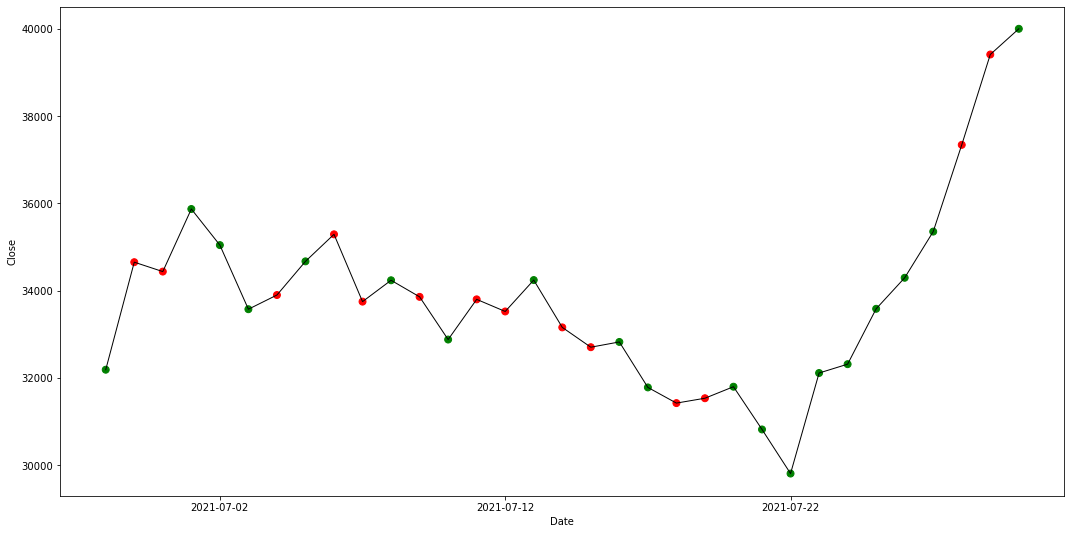

In [313]:
%matplotlib inline
import  matplotlib.pyplot as plt

colors = ['green' if x else 'red' for x in res== y_test]

ax = plt.gca()
ax.plot(X_test['Close'],lw = 1, c = 'black')
X_test.reset_index().plot.scatter( x = 'Date', y = 'Close',color = colors,s = 48,ax= ax,figsize=(18,9))
ax.xaxis.set_major_locator(plt.MaxNLocator(4))

In [314]:
from sklearn.metrics import classification_report
print(classification_report(y_test, res))

              precision    recall  f1-score   support

       False       0.33      0.08      0.12        13
        True       0.60      0.90      0.72        20

    accuracy                           0.58        33
   macro avg       0.47      0.49      0.42        33
weighted avg       0.49      0.58      0.49        33



In [315]:
cryptocurrencies = ['BTC-USD']
start_date = "2021-01-01"
end_date = "2022-07-11"
bitcoin_data2 = yf.download(cryptocurrencies, start_date, end_date)

[*********************100%***********************]  1 of 1 completed


<AxesSubplot:xlabel='Date'>

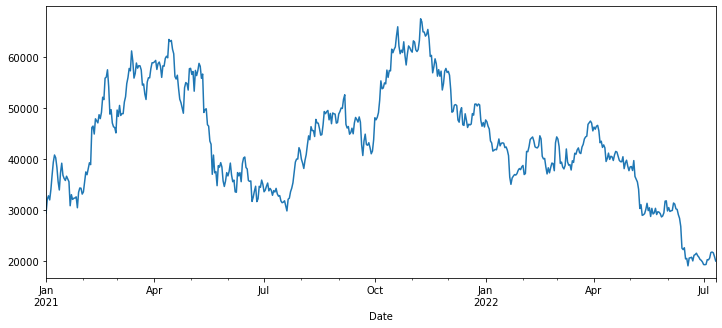

In [316]:
bitcoin_data2["Close"].plot(figsize=(12,5))

In [317]:
btc_sentiments2 = pd.read_csv(
    Path("Resources/BTC_sentiment_analysis.csv")
)

btc_sentiments2

,text,date,compound,positive,negative,neutral
0,Blue Ridge Bank shares halted by NYSE after #b...,7/1/20,0.2960,0.145,0.0,0.855
1,"😎 Today, that's this #Thursday, we will do a ""...",7/2/20,0.4939,0.151,0.0,0.849
2,"Guys evening, I have read this article about B...",7/3/20,0.5719,0.227,0.0,0.773
3,$BTC A big chance in a billion! Price: \487264...,7/4/20,0.3164,0.160,0.0,0.840
4,This network is secured by 9 508 nodes as of t...,7/5/20,0.4019,0.109,0.0,0.891
...,...,...,...,...,...,...
737,@PrvinPanghal @elonmusk Use Voyager app bro. I...,7/8/22,0.0000,0.000,0.0,1.000
738,I also hold #Axion instead of just #Bitcoin be...,7/9/22,0.0000,0.000,0.0,1.000
739,@WSBChairman Need to HODL any CRYPTO like #ETH...,7/10/22,0.3612,0.161,0.0,0.839
740,1000 satoshi every 60 minutes. only at https:/...,7/11/22,0.5106,0.155,0.0,0.845


In [318]:
btc_sentiments2 = btc_sentiments2.set_index("date")
btc_sentiments2.index = pd.to_datetime(btc_sentiments2.index)
btc_sentiments2 

,text,compound,positive,negative,neutral
date,,,,,
2020-07-01,Blue Ridge Bank shares halted by NYSE after #b...,0.2960,0.145,0.0,0.855
2020-07-02,"😎 Today, that's this #Thursday, we will do a ""...",0.4939,0.151,0.0,0.849
2020-07-03,"Guys evening, I have read this article about B...",0.5719,0.227,0.0,0.773
2020-07-04,$BTC A big chance in a billion! Price: \487264...,0.3164,0.160,0.0,0.840
2020-07-05,This network is secured by 9 508 nodes as of t...,0.4019,0.109,0.0,0.891
...,...,...,...,...,...
2022-07-08,@PrvinPanghal @elonmusk Use Voyager app bro. I...,0.0000,0.000,0.0,1.000
2022-07-09,I also hold #Axion instead of just #Bitcoin be...,0.0000,0.000,0.0,1.000
2022-07-10,@WSBChairman Need to HODL any CRYPTO like #ETH...,0.3612,0.161,0.0,0.839


In [319]:
btc_sentiments2 = btc_sentiments2.loc["2021-01-01":"2022-07-01"]
btc_sentiments2

,text,compound,positive,negative,neutral
date,,,,,
2021-01-01,Mind your phones! Full story: https://t.co/jDd...,0.0000,0.000,0.000,1.000
2021-01-02,$algo hey @Grayscale look algo and stake good ...,0.4404,0.116,0.000,0.884
2021-01-03,Market Id : BTC-AUD\nLast Price :58838.51\n24 ...,0.8074,0.285,0.071,0.644
2021-01-04,Check me out! \n\n#ZRX #0x #cryptoart #cryptot...,0.0000,0.000,0.000,1.000
2021-01-05,Will other companies join Tesla on picking up ...,0.2960,0.115,0.000,0.885
...,...,...,...,...,...
2022-06-27,$BTC A big chance in a million! Price: \489273...,0.3164,0.160,0.000,0.840
2022-06-28,Following the wild ride in #cryptos? Get our u...,0.6037,0.182,0.050,0.768
2022-06-29,RICH DAD POOR DAD. I learnt with @theRealKiyos...,0.1280,0.268,0.237,0.495


In [320]:
btc_data_sent2 = pd.concat([bitcoin_data2, btc_sentiments2], axis=1, join="inner")
btc_data_sent2 = btc_data_sent2.drop(columns=["text"])
display(btc_data_sent2.head())
display(btc_data_sent2.tail())

,Open,High,Low,Close,Adj Close,Volume,compound,positive,negative,neutral
2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344,29374.152344,40730301359,0.0000,0.000,0.000,1.000
2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578,32127.267578,67865420765,0.4404,0.116,0.000,0.884
2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438,32782.023438,78665235202,0.8074,0.285,0.071,0.644
2021-01-04,32810.949219,33440.218750,28722.755859,31971.914062,31971.914062,81163475344,0.0000,0.000,0.000,1.000
2021-01-05,31977.041016,34437.589844,30221.187500,33992.429688,33992.429688,67547324782,0.2960,0.115,0.000,0.885


,Open,High,Low,Close,Adj Close,Volume,compound,positive,negative,neutral
2022-06-27,21028.238281,21478.089844,20620.199219,20735.478516,20735.478516,20965695707,0.3164,0.160,0.000,0.840
2022-06-28,20731.544922,21164.423828,20228.812500,20280.634766,20280.634766,21381535161,0.6037,0.182,0.050,0.768
2022-06-29,20281.169922,20364.156250,19937.791016,20104.023438,20104.023438,23552740328,0.1280,0.268,0.237,0.495
2022-06-30,20108.312500,20141.160156,18729.656250,19784.726562,19784.726562,26267239923,0.6369,0.231,0.000,0.769
2022-07-01,19820.470703,20632.671875,19073.708984,19269.367188,19269.367188,30767551159,0.6597,0.205,0.000,0.795


In [321]:
y2 = bitcoin_data2["Close"].pct_change().dropna()
y2 = (y2 > 0)
y2.value_counts()
y2 = y2.loc["2021-01-04":"2022-07-01"]

In [322]:
X2 = bitcoin_data2.shift(periods=2).dropna()
X2 = X2.loc["2021-01-03":"2022-06-30"]

In [323]:
X2.shape, y2.shape

((544, 6), (544,))

In [324]:
num_test2 = 35
X_train2 = X2[:-num_test]
y_train2 = y2[:-num_test]
X_test2 = X2[-num_test:]
y_test2 = y2[-num_test:]

In [325]:
from sklearn.ensemble import RandomForestClassifier

clf2 = RandomForestClassifier(max_depth=4, random_state=17)
clf2.fit(X_train2, y_train2)

RandomForestClassifier(max_depth=4, random_state=17)

In [326]:
res2 = clf2.predict(X_test2)
acc2 = (res2== y_test2.values).mean()
print(acc2)

0.42424242424242425


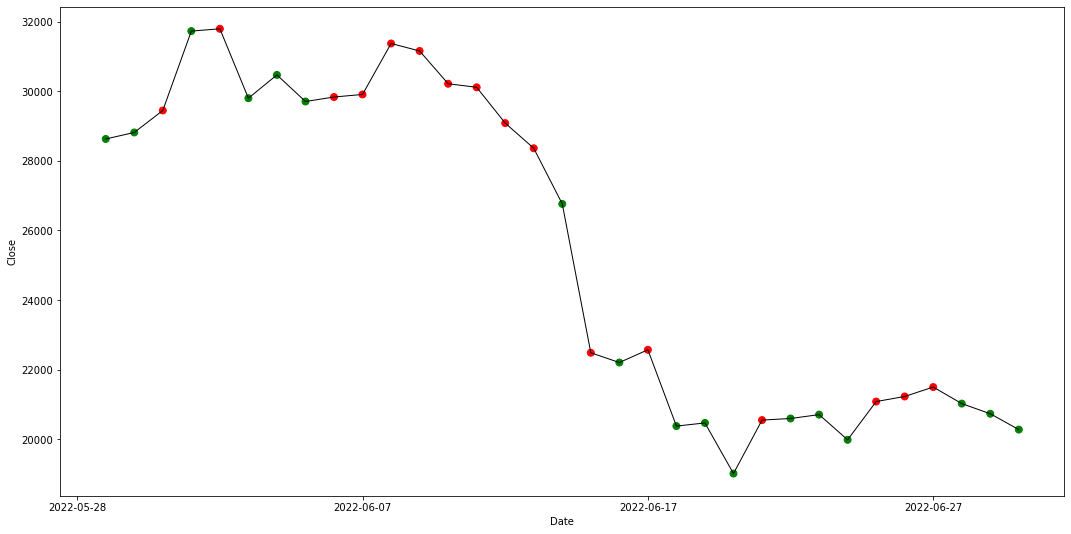

In [327]:
%matplotlib inline
import  matplotlib.pyplot as plt

colors = ['green' if x else 'red' for x in res== y_test2]

ax = plt.gca()
ax.plot(X_test2['Close'],lw = 1, c = 'black')
X_test2.reset_index().plot.scatter( x = 'Date', y = 'Close',color = colors,s = 48,ax= ax,figsize=(18,9))
ax.xaxis.set_major_locator(plt.MaxNLocator(4))

In [328]:
from sklearn.metrics import classification_report
print(classification_report(y_test2, res2))

              precision    recall  f1-score   support

       False       0.50      0.05      0.10        19
        True       0.42      0.93      0.58        14

    accuracy                           0.42        33
   macro avg       0.46      0.49      0.34        33
weighted avg       0.47      0.42      0.30        33

